In [539]:
import numpy as np   
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics

In [540]:
cData = pd.read_csv("vehicle.csv")  
cData.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [541]:
cData.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

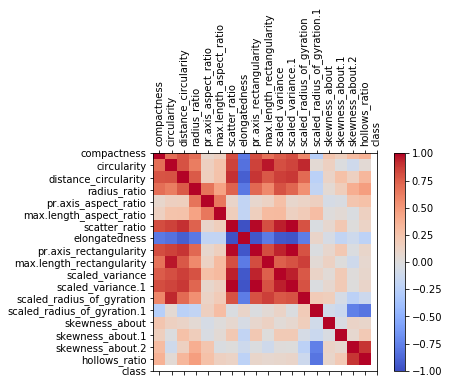

The correlation between attributes is presented above


In [542]:
corr = cData.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(cData.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(cData.columns)
ax.set_yticklabels(cData.columns)
plt.show()
print("The correlation between attributes is presented above")

In [543]:
cData.replace('', np.nan, inplace=True)
print(cData.isna().apply(pd.value_counts))
print("Replacing blank values with NaN and checking which columns contain them")

       compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840       

In [544]:
cData['circularity'] = cData['circularity'].fillna((cData['circularity'].mean()))
cData['distance_circularity'] = cData['distance_circularity'].fillna((cData['distance_circularity'].mean()))
cData['radius_ratio'] = cData['radius_ratio'].fillna((cData['radius_ratio'].mean()))
cData['pr.axis_aspect_ratio'] = cData['pr.axis_aspect_ratio'].fillna((cData['pr.axis_aspect_ratio'].mean()))
cData['scatter_ratio'] = cData['scatter_ratio'].fillna((cData['scatter_ratio'].mean()))
cData['pr.axis_rectangularity'] = cData['pr.axis_rectangularity'].fillna((cData['pr.axis_rectangularity'].mean()))
cData['elongatedness'] = cData['elongatedness'].fillna((cData['elongatedness'].mean()))
cData['scaled_variance'] = cData['scaled_variance'].fillna((cData['scaled_variance'].mean()))
cData['scaled_variance.1'] = cData['scaled_variance.1'].fillna((cData['scaled_variance.1'].mean()))
cData['scaled_radius_of_gyration'] = cData['scaled_radius_of_gyration'].fillna((cData['scaled_radius_of_gyration'].mean()))
cData['scaled_radius_of_gyration.1'] = cData['scaled_radius_of_gyration.1'].fillna((cData['scaled_radius_of_gyration.1'].mean()))
cData['skewness_about'] = cData['skewness_about'].fillna((cData['skewness_about'].mean()))
cData['skewness_about.1'] = cData['skewness_about.1'].fillna((cData['skewness_about.1'].mean()))
cData['skewness_about.2'] = cData['skewness_about.2'].fillna((cData['skewness_about.2'].mean()))
print("All NaN values are replaced with the means of their columns")

All NaN values are replaced with the means of their columns


In [545]:
X=cData.drop(labels= "class" , axis = 1)
y=cData["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [546]:
clf = svm.SVC(gamma=0.025, C=3)   

In [547]:
clf.fit(X_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [548]:
y_pred = clf.predict(X_test)

In [549]:
print( 'Total Accuracy with raw data: ', metrics.accuracy_score( y_test, y_pred))

Total Accuracy with raw data:  0.5354330708661418


In [550]:
cData = cData.drop(['class','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio','scaled_radius_of_gyration.1','pr.axis_aspect_ratio','max.length_aspect_ratio'], axis=1)
print("Class is being dropped as it is not numerical, the other dropped columns have no relation to other columns in any way")

Class is being dropped as it is not numerical, the other dropped columns have no relation to other columns in any way


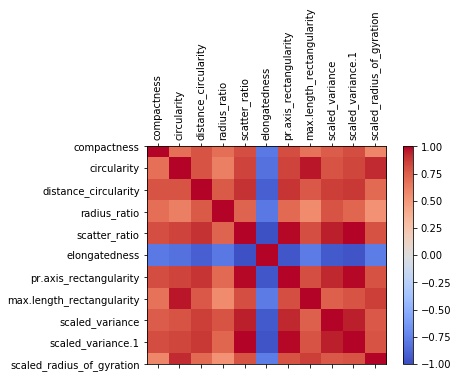

The correlation between attributes is presented above


In [551]:
corr = cData.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(cData.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(cData.columns)
ax.set_yticklabels(cData.columns)
plt.show()
print("The correlation between attributes is presented above")

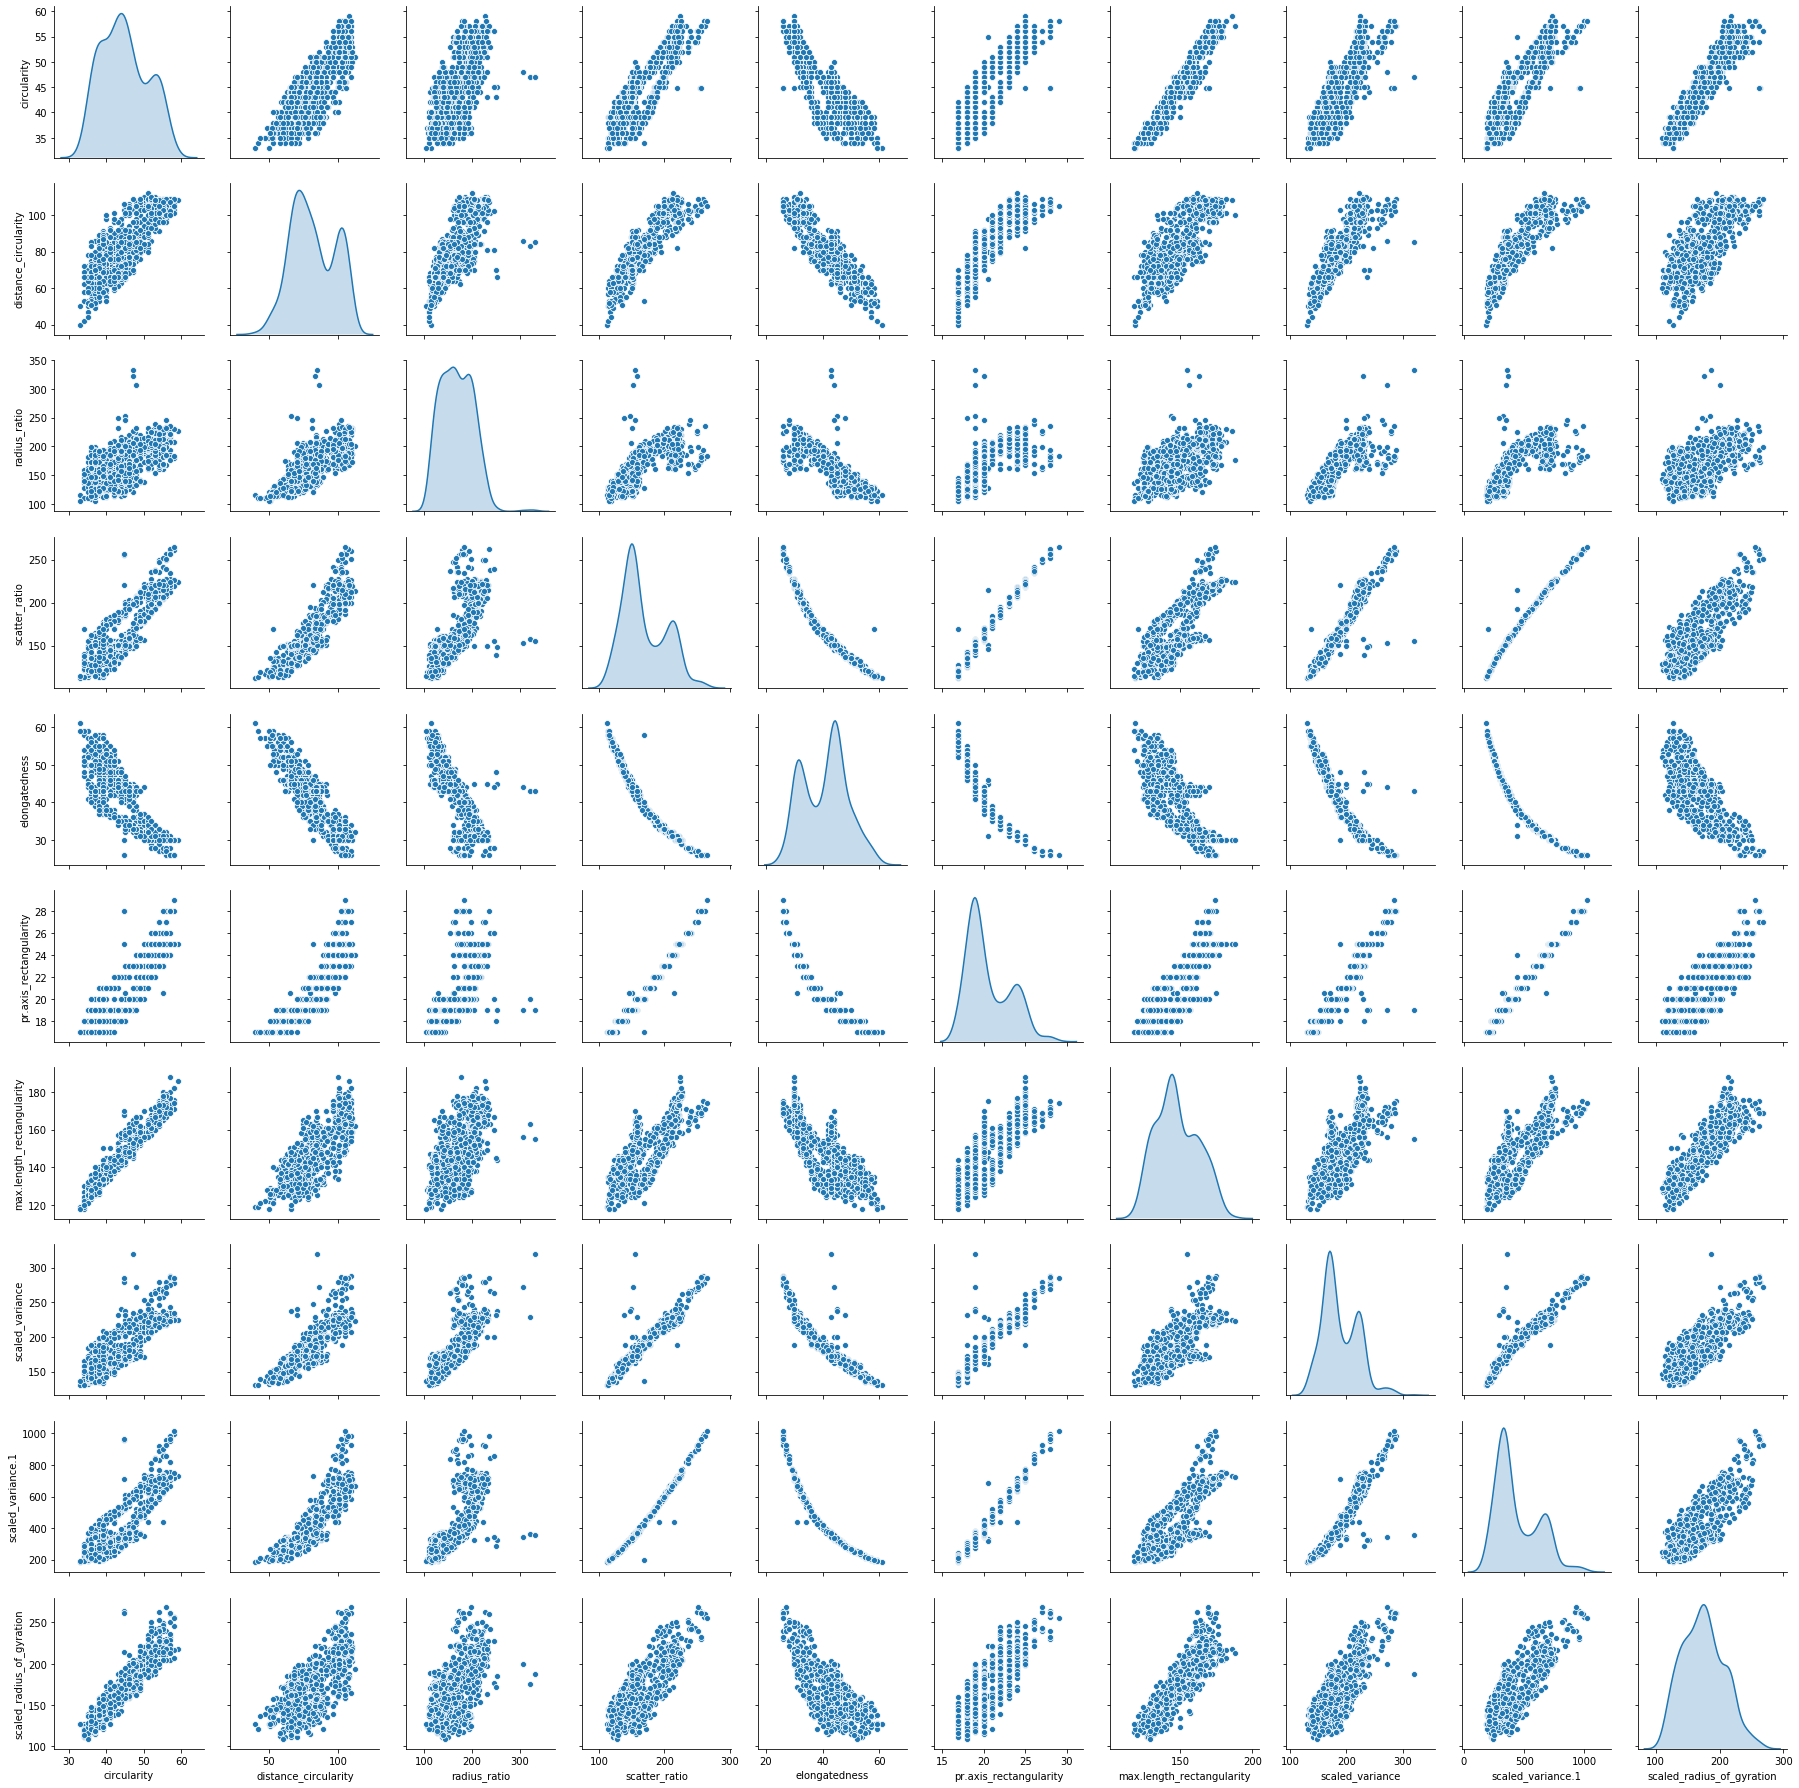

In [552]:
X = cData.drop(['compactness'], axis=1)
# the dependent variable
y = cData['compactness']

sns.pairplot(X, diag_kind='kde')

In [553]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,circularity,distance_circularity,radius_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration
0,0.517302,0.056545,0.272965,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618
1,-0.624564,0.120112,-0.835442,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719
2,0.843549,1.518571,1.201630,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391
3,-0.624564,-0.007021,-0.296217,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773
4,-0.135193,-0.769817,1.081803,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593


In [554]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.79395399  0.62170187  0.84921058 -0.82287347  0.84597164
   0.96308094  0.7977645   0.83951746  0.92798524]
 [ 0.79395399  1.00118343  0.76798667  0.90547061 -0.91251368  0.89418513
   0.77558624  0.86300031  0.88837793  0.70678835]
 [ 0.62170187  0.76798667  1.00118343  0.73509724 -0.79072934  0.70912305
   0.56987817  0.79498064  0.72100219  0.5371705 ]
 [ 0.84921058  0.90547061  0.73509724  1.00118343 -0.97187169  0.99054075
   0.80931225  0.9494185   0.99496023  0.80021174]
 [-0.82287347 -0.91251368 -0.79072934 -0.97187169  1.00118343 -0.9502004
  -0.77643696 -0.93782312 -0.95620413 -0.76693543]
 [ 0.84597164  0.89418513  0.70912305  0.99054075 -0.9502004   1.00118343
   0.81240688  0.93567387  0.99066083  0.79801083]
 [ 0.96308094  0.77558624  0.56987817  0.80931225 -0.77643696  0.81240688
   1.00118343  0.74609112  0.79695953  0.86744991]
 [ 0.7977645   0.86300031  0.79498064  0.9494185  -0.93782312  0.93567387
   0.74609112  1.00118343  0.94814159  0.77989661]
 

In [555]:
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [556]:
print(pca.explained_variance_)

[8.51771954e+00 7.26735454e-01 3.38618309e-01 1.93694899e-01
 1.00267354e-01 5.51751427e-02 4.40796622e-02 2.19706008e-02
 9.71603986e-03 3.85731860e-03]


In [557]:
print(pca.components_)

[[ 3.14286704e-01  3.16600454e-01  2.67892478e-01  3.35815542e-01
  -3.30980039e-01  3.32952780e-01  3.01478027e-01  3.25917940e-01
   3.33175757e-01  2.96524252e-01]
 [-4.11312453e-01  1.83335289e-01  5.17950455e-01  9.57377962e-02
  -1.86386300e-01  6.54335373e-02 -4.55200148e-01  1.97327697e-01
   9.23131825e-02 -4.75482197e-01]
 [ 2.42664296e-01  2.78847596e-02  7.37722508e-01 -2.83960575e-01
   1.21394591e-01 -3.27155516e-01  2.50887766e-01 -1.09819500e-01
  -3.28064375e-01  1.05212954e-01]
 [-5.80690045e-02 -6.40999961e-01  1.75621907e-01  5.97467002e-03
   2.00876556e-02 -1.84606159e-02 -3.76910055e-01  3.76103634e-01
   6.93578931e-02  5.15556332e-01]
 [ 1.18606697e-01 -6.36885938e-01  1.27516389e-01  1.28068121e-01
   3.55876108e-02  1.92509763e-01  4.29645504e-01  1.67424658e-02
   1.80380148e-01 -5.40284949e-01]
 [-1.33943282e-01  1.88902488e-01 -1.26126600e-01 -1.55247591e-01
   4.98855395e-01 -8.04257797e-02  2.44383702e-01  7.55957288e-01
  -7.23912195e-02 -1.20851139e-01

In [558]:
print(pca.explained_variance_ratio_)

[8.50765131e-01 7.25876429e-02 3.38218051e-02 1.93465945e-02
 1.00148834e-02 5.51099239e-03 4.40275585e-03 2.19446308e-03
 9.70455518e-04 3.85275912e-04]


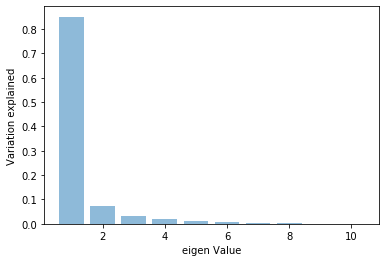

In [559]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

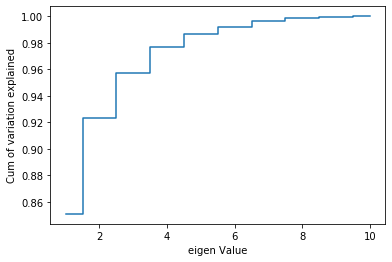

Based on these graphs, 3 components will be enough to capture 95% of variance


In [560]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()
print("Based on these graphs, 3 components will be enough to capture 95% of variance")

In [561]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf.fit(X_t_train, y_train)
y_pred=clf.predict(X_t_test)
print( 'Total Accuracy using only principal components: ',metrics.accuracy_score( y_test, y_pred))

Total Accuracy using only principal components:  0.610236220472441


In [562]:
print("The accuracy score of the Support Vector Macine is higher when using only Principal Components(61%) than it is for the raw data(53%), hence there is an improvement")

The accuracy score of the Support Vector Macine is higher when using only Principal Components(61%) than it is for the raw data(53%), hence there is an improvement
